In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tata-online-retail-dataset/Online Retail Data Set.xlsx
/kaggle/input/tata-online-retail-dataset/Online Retail Data Set.csv


In [2]:
df = pd.read_csv('/kaggle/input/tata-online-retail-dataset/Online Retail Data Set.csv', encoding='latin1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],format='mixed')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-06-15 21:29:55.768514560,4.611114,15287.690570
min,-80995.000000,2010-01-12 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-23 10:25:00,1.250000,13953.000000
50%,3.000000,2011-07-03 14:51:00,2.080000,15152.000000
75%,10.000000,2011-10-05 10:18:00,4.130000,16791.000000
max,80995.000000,2011-12-10 17:19:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [7]:
df_cleaned = df.drop_duplicates()

In [8]:
df_cleaned = df_cleaned.dropna(subset=['Description'])

In [9]:
df_nul = df_cleaned[pd.isnull(df['CustomerID'])]

/tmp/ipykernel_33/3507327700.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_nul = df_cleaned[pd.isnull(df['CustomerID'])]


In [10]:
df_cleaned = df_cleaned.dropna(subset=['CustomerID'])

In [11]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [12]:
df_nul.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133583 entries, 1443 to 541540
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    133583 non-null  object        
 1   StockCode    133583 non-null  object        
 2   Description  133583 non-null  object        
 3   Quantity     133583 non-null  int64         
 4   InvoiceDate  133583 non-null  datetime64[ns]
 5   UnitPrice    133583 non-null  float64       
 6   CustomerID   0 non-null       float64       
 7   Country      133583 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 9.2+ MB


In [13]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [14]:
len(df['Description'].unique())

4224

In [15]:
len(df['StockCode'].unique())

4070

In [16]:
# Group by 'StockCode' and count the number of unique 'Description' values for each 'StockCode'
stock_description_counts = df_cleaned.groupby('StockCode')['Description'].nunique()

# Filter to find 'StockCode' with more than one unique 'Description'
multiple_descriptions = stock_description_counts[stock_description_counts > 1]

# Display the result
print(multiple_descriptions)

StockCode
16156L    2
17107D    3
20622     2
20725     2
20914     2
         ..
85184C    2
85185B    2
90014A    2
90014B    2
90014C    2
Name: Description, Length: 213, dtype: int64


In [17]:
rows_with_multiple_descriptions = df_cleaned[df_cleaned['StockCode']=='90014C']

# Display these rows
print(rows_with_multiple_descriptions['Description'].unique())

['SILVER/BLACK ORBIT NECKLACE' 'SILVER AND BLACK ORBIT NECKLACE']


In [18]:
df_nul.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-01-12 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-01-12 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-01-12 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-01-12 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-01-12 14:32:00,1.66,NaN,United Kingdom


In [19]:
#I want to create a sales vs time plot
#First I want to group by date and add the unitprice*quantity to get the whole sales and then line plot

In [20]:
df.index

RangeIndex(start=0, stop=541909, step=1)

In [21]:
df[0:2][['StockCode','InvoiceNo']]

,StockCode,InvoiceNo
0,85123A,536365
1,71053,536365


In [74]:
df_sales = df_cleaned

In [75]:
df_sales['bill']=df_sales['Quantity']*df_sales['UnitPrice']

In [76]:
df_sales.agg(['min', 'max']).transpose()

,min,max
InvoiceNo,536365,C581569
StockCode,10002,POST
Description,4 PURPLE FLOCK DINNER CANDLES,ZINC WIRE SWEETHEART LETTER TRAY
Quantity,-80995,80995
InvoiceDate,2010-01-12 08:26:00,2011-12-10 17:19:00
UnitPrice,0.0,38970.0
CustomerID,12346.0,18287.0
Country,Australia,Unspecified
bill,-168469.6,168469.6


In [24]:
#df_sales.head()
s=df_sales.groupby('InvoiceDate')['bill'].sum()

<Axes: xlabel='InvoiceDate'>

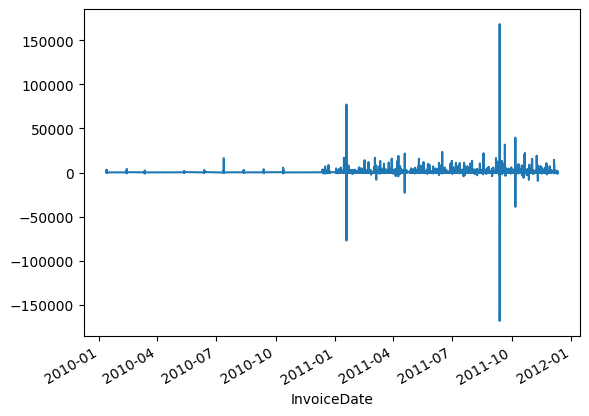

In [25]:
import matplotlib.pyplot as plt
s.plot()


In [26]:
df_sales[df_sales['InvoiceDate']=='10-06-2011 15:31']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,bill
222681,C556445,M,Manual,-1,2011-10-06 15:31:00,38970.0,15098.0,United Kingdom,-38970.0


In [27]:
df_sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,bill
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


In [28]:
sum=s.resample("1ME").sum()

In [29]:
mean = s.resample("24h").mean()

In [30]:
sum.isnull().sum()

0

In [31]:
len(sum)

24

<Axes: xlabel='InvoiceDate'>

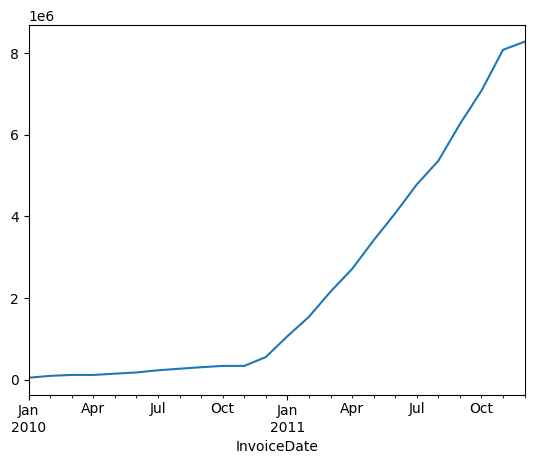

In [32]:
sum.cumsum().plot()

<Axes: xlabel='InvoiceDate'>

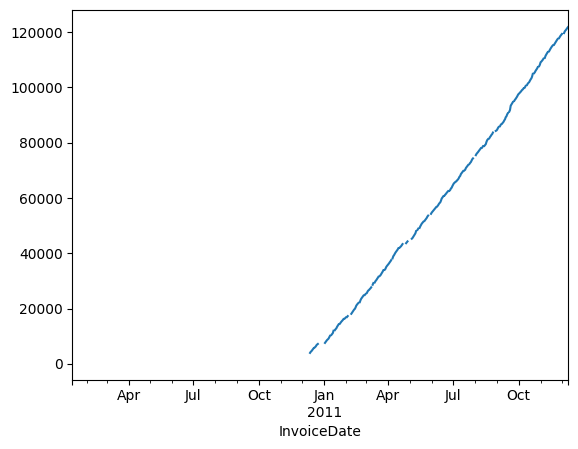

In [33]:
mean.cumsum().plot()

In [34]:
cnt = df_sales.groupby('InvoiceDate')['InvoiceNo'].count()

In [35]:
cntsum=cnt.resample("1m").sum()

/tmp/ipykernel_33/3323593964.py:1: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  cntsum=cnt.resample("1m").sum()


<Axes: xlabel='InvoiceDate'>

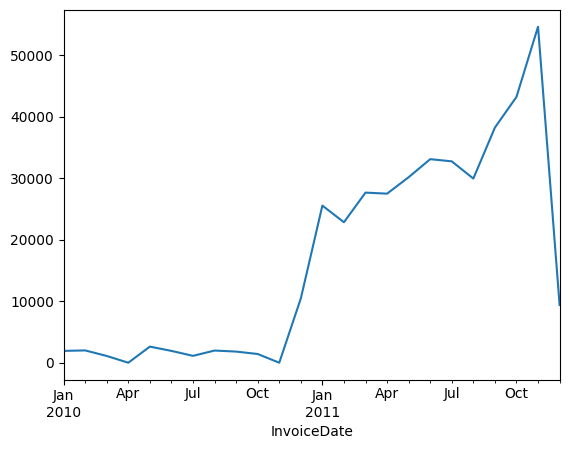

In [36]:
cntsum.plot()

In [37]:
cntsum

InvoiceDate
2010-01-31     1924
2010-02-28     2003
2010-03-31     1100
2010-04-30        0
2010-05-31     2619
2010-06-30     1926
2010-07-31     1117
2010-08-31     1982
2010-09-30     1812
2010-10-31     1418
2010-11-30        0
2010-12-31    10453
2011-01-31    25567
2011-02-28    22861
2011-03-31    27681
2011-04-30    27511
2011-05-31    30186
2011-06-30    33124
2011-07-31    32769
2011-08-31    29968
2011-09-30    38265
2011-10-31    43254
2011-11-30    54676
2011-12-31     9388
Freq: ME, Name: InvoiceNo, dtype: int64

In [38]:
cvsst=df_sales.groupby('Country')['StockCode'].nunique()

Country
Australia                600
Austria                  307
Bahrain                   16
Belgium                  778
Brazil                    32
Canada                   147
Channel Islands          430
Cyprus                   498
Czech Republic            25
Denmark                  251
EIRE                    1950
European Community        50
Finland                  458
France                  1523
Germany                 1671
Greece                   138
Iceland                  103
Israel                   221
Italy                    477
Japan                    216
Lebanon                   45
Lithuania                 29
Malta                     99
Netherlands              785
Norway                   591
Poland                   204
Portugal                 686
RSA                       58
Saudi Arabia               9
Singapore                178
Spain                   1093
Sweden                   261
Switzerland              947
USA                      163
United

In [40]:
cvssa = df_sales.groupby('Country')['bill'].sum()

In [41]:
cvssa

Country
Australia                137009.770
Austria                   10154.320
Bahrain                     548.400
Belgium                   40910.960
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20076.390
Cyprus                    12858.760
Czech Republic              707.720
Denmark                   18768.140
EIRE                     250001.780
European Community         1291.750
Finland                   22326.740
France                   196626.050
Germany                  221509.470
Greece                     4710.520
Iceland                    4310.000
Israel                     6988.400
Italy                     16890.510
Japan                     35340.620
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2505.470
Netherlands              284661.540
Norway                    35163.460
Poland                     7213.140
Portugal                  28995.760
RSA                 

In [49]:
unique_unit_prices = df_sales.groupby('StockCode')['UnitPrice'].nunique()

In [50]:
stockcodes= unique_unit_prices[unique_unit_prices ==1]

In [51]:
stockcodes

StockCode
10002     1
10120     1
10123C    1
10124A    1
10124G    1
         ..
90214O    1
90214T    1
90214U    1
90214W    1
90214Z    1
Name: UnitPrice, Length: 1042, dtype: int64

In [52]:
unique_unit_prices[unique_unit_prices ==2]

StockCode
10080           2
10125           2
10133           2
15034           2
15039           2
               ..
90214S          2
90214V          2
90214Y          2
BANK CHARGES    2
PADS            2
Name: UnitPrice, Length: 1255, dtype: int64

In [53]:
unique_unit_prices[unique_unit_prices ==3]

StockCode
11001     3
15044A    3
15044D    3
15060B    3
16008     3
         ..
90086     3
90087     3
90093     3
90210B    3
90210C    3
Name: UnitPrice, Length: 898, dtype: int64

In [54]:
unique_unit_prices[unique_unit_prices ==4]

StockCode
16216     4
20619     4
20679     4
20711     4
20936     4
         ..
85170D    4
85174     4
85180A    4
85184C    4
C2        4
Name: UnitPrice, Length: 307, dtype: int64

In [55]:
unique_unit_prices[unique_unit_prices ==5]

StockCode
10135      5
15036      5
15056BL    5
15056N     5
15056P     5
          ..
84813      5
84951B     5
84970L     5
85159B     5
85173      5
Name: UnitPrice, Length: 92, dtype: int64

In [65]:
unique_unit_prices[unique_unit_prices >12]

StockCode
CRUK     16
D        75
DOT      16
M       184
POST     71
Name: UnitPrice, dtype: int64

In [105]:
df_sales[df_sales['StockCode']=='DOT']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,bill
317507,564764,DOT,DOTCOM POSTAGE,1,2011-08-30 10:49:00,11.17,14096.0,United Kingdom,11.17
324002,565383,DOT,DOTCOM POSTAGE,1,2011-02-09 15:45:00,16.46,14096.0,United Kingdom,16.46
333755,566217,DOT,DOTCOM POSTAGE,1,2011-09-09 15:17:00,13.16,14096.0,United Kingdom,13.16
338829,566566,DOT,DOTCOM POSTAGE,1,2011-09-13 12:32:00,85.58,14096.0,United Kingdom,85.58
350599,567656,DOT,DOTCOM POSTAGE,1,2011-09-21 14:40:00,878.55,14096.0,United Kingdom,878.55
361584,568346,DOT,DOTCOM POSTAGE,1,2011-09-26 15:28:00,688.08,14096.0,United Kingdom,688.08
372766,569246,DOT,DOTCOM POSTAGE,1,2011-03-10 09:57:00,490.25,14096.0,United Kingdom,490.25
389983,570488,DOT,DOTCOM POSTAGE,1,2011-10-10 17:12:00,635.01,14096.0,United Kingdom,635.01
401766,571441,DOT,DOTCOM POSTAGE,1,2011-10-17 13:31:00,743.62,14096.0,United Kingdom,743.62
416463,572552,DOT,DOTCOM POSTAGE,1,2011-10-24 17:07:00,638.30,14096.0,United Kingdom,638.30


In [87]:
df_sales[df_sales['InvoiceNo']=='C538897']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,bill
31134,C538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422.0,United Kingdom,-5.76
31135,C538897,D,Discount,-1,2010-12-15 09:14:00,42.50,16422.0,United Kingdom,-42.50
